# Proyecto Telecom-X Parte 2

In [211]:
import pandas as pd
url = 'https://raw.githubusercontent.com/EvaI22/Proyecto-Telecom-X-Parte-2/refs/heads/main/dataset.csv'
df = pd.read_csv(url)
df.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly,total,cuentas_diarias
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


### Eliminación de Columnas Irrelevantes

In [212]:
df = df.drop(columns = "customer_id")

In [213]:
df.head(3)

,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly,total,cuentas_diarias
0,0,0,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0,1,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,1,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333


### Transforma las variables categóricas, one-hot encoding.

In [214]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categoricas = [ # Variables con más de 2 categorías.
    'multiple_lines',
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'contract',
    'payment_method'
]

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),categoricas),
    remainder='passthrough')

df = one_hot_enc.fit_transform(df)
df = pd.DataFrame(df, columns=one_hot_enc.get_feature_names_out())
df.head()


,onehotencoder__multiple_lines_No,onehotencoder__multiple_lines_No phone service,onehotencoder__multiple_lines_Yes,onehotencoder__internet_service_DSL,onehotencoder__internet_service_Fiber optic,onehotencoder__internet_service_No,onehotencoder__online_security_No,onehotencoder__online_security_No internet service,onehotencoder__online_security_Yes,onehotencoder__online_backup_No,...,remainder__gender,remainder__senior_citizen,remainder__partner,remainder__dependents,remainder__tenure,remainder__phone_service,remainder__paperless_billing,remainder__monthly,remainder__total,remainder__cuentas_diarias
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.6,593.30,2.186667
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,9.0,1.0,0.0,59.9,542.40,1.996667
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.9,280.85,2.463333
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.0,1237.85,3.266667
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,3.0,1.0,1.0,83.9,267.40,2.796667


In [215]:
df.columns

Index(['onehotencoder__multiple_lines_No',
       'onehotencoder__multiple_lines_No phone service',
       'onehotencoder__multiple_lines_Yes',
       'onehotencoder__internet_service_DSL',
       'onehotencoder__internet_service_Fiber optic',
       'onehotencoder__internet_service_No',
       'onehotencoder__online_security_No',
       'onehotencoder__online_security_No internet service',
       'onehotencoder__online_security_Yes', 'onehotencoder__online_backup_No',
       'onehotencoder__online_backup_No internet service',
       'onehotencoder__online_backup_Yes',
       'onehotencoder__device_protection_No',
       'onehotencoder__device_protection_No internet service',
       'onehotencoder__device_protection_Yes',
       'onehotencoder__tech_support_No',
       'onehotencoder__tech_support_No internet service',
       'onehotencoder__tech_support_Yes', 'onehotencoder__streaming_tv_No',
       'onehotencoder__streaming_tv_No internet service',
       'onehotencoder__streaming_tv

### Verificación de la Proporción de Cancelación (Churn)

In [216]:
df['remainder__churn'].value_counts()

,count
remainder__churn,
0.0,5163
1.0,1869


 Observación: existe un desbalance entre las clases (son más las personas que permanecen que los que han abandonado). En consecuencia, aquello puede impactar en los modelos predictivos y en el análisis de los resultados.

### Normalización con MinMaxScaler
Las columnas que no fueron normalizadas a 0 y 1 deben ser transformadas a través de MinMaxScaler.

Información importante:
- Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento.
- Modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [217]:
from sklearn.preprocessing import MinMaxScaler

columnasNormalizacion = [
    'remainder__tenure',
    'remainder__monthly',
    'remainder__total',
    'remainder__cuentas_diarias' ]

normalizar = MinMaxScaler()

df[columnasNormalizacion] = normalizar.fit_transform(df[columnasNormalizacion])

In [218]:
df.head()

,onehotencoder__multiple_lines_No,onehotencoder__multiple_lines_No phone service,onehotencoder__multiple_lines_Yes,onehotencoder__internet_service_DSL,onehotencoder__internet_service_Fiber optic,onehotencoder__internet_service_No,onehotencoder__online_security_No,onehotencoder__online_security_No internet service,onehotencoder__online_security_Yes,onehotencoder__online_backup_No,...,remainder__gender,remainder__senior_citizen,remainder__partner,remainder__dependents,remainder__tenure,remainder__phone_service,remainder__paperless_billing,remainder__monthly,remainder__total,remainder__cuentas_diarias
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.112676,1.0,1.0,0.471144,0.066294,0.471144
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.112676,1.0,0.0,0.414428,0.060420,0.414428
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.042254,1.0,1.0,0.553731,0.030239,0.553731
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.169014,1.0,1.0,0.793532,0.140670,0.793532
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.028169,1.0,1.0,0.653234,0.028687,0.653234


In [219]:
# Luego de ver la matriz de correlación df.corr(), vemos en específico la relación de covarianza con esta variable y las demás.

df.corr()["remainder__churn"].sort_values(ascending=False)

,remainder__churn
remainder__churn,1.000000
onehotencoder__contract_Month-to-month,0.404565
onehotencoder__online_security_No,0.342235
onehotencoder__tech_support_No,0.336877
onehotencoder__internet_service_Fiber optic,0.307463
onehotencoder__payment_method_Electronic check,0.301455
onehotencoder__online_backup_No,0.267595
onehotencoder__device_protection_No,0.252056
remainder__monthly,0.192858
remainder__cuentas_diarias,0.192858


### Análisis Dirigido

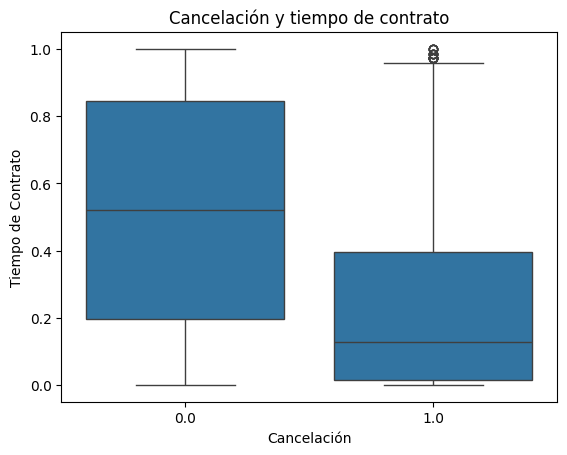

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='remainder__churn', y='remainder__tenure', data=df)
plt.title('Cancelación y tiempo de contrato')
plt.xlabel('Cancelación')
plt.ylabel('Tiempo de Contrato')
plt.show()

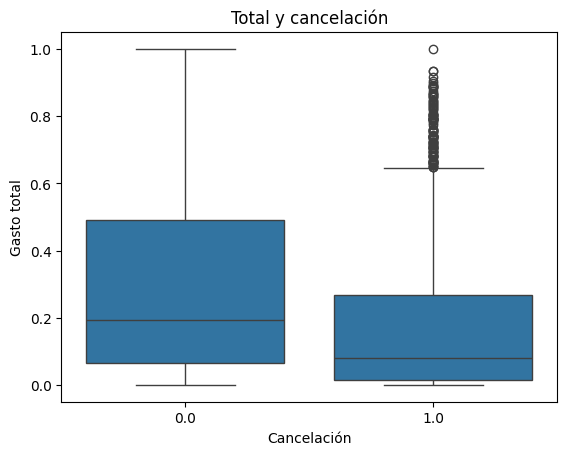

In [221]:
sns.boxplot(x='remainder__churn', y='remainder__total', data=df)
plt.title('Total y cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Gasto total')
plt.show()

### Separación de Datos

In [222]:
from sklearn.model_selection import train_test_split # Importamos la librería de sklearn.

# Separamos la variable respuesta de las demás
y = df['remainder__churn']
X = df.drop('remainder__churn', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Método KNN (Vecinos más cercanos)

In [223]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) # Adapto los datos unicamente del entrenamiento.

# Predecir valores (trata de adivinar si cada cliente cancelo o no, y luego compara con el original)
y_pred = knn.predict(X_test)

In [224]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

print(f'Exactitud: {accuracy_score(y_test, y_pred)}')  # La precisión es [casos bien predecidos/casos totales] % de aciertos aproximadamente.
print(f'Recall: {recall_score(y_test, y_pred)}') # Cuantos casos de cancelación detectó reales, es decir busca los casos positivos (clientes que han cancelado)
print(f'Precisión: {precision_score(y_test, y_pred)}') # De los cuales asumió que cancelaban, realmente lo hicieron.
print(f'F1_Score: {f1_score(y_test, y_pred)}')
print('Matriz de Confusión') # Dice cuantos casos se clasificaron bien y mal en cada clase.
confusion_matrix(y_test, y_pred)

Exactitud: 0.7505330490405118
Recall: 0.5
Precisión: 0.5327635327635327
F1_Score: 0.5158620689655172
Matriz de Confusión


array([[869, 164],
       [187, 187]])

Árbol de decisión

In [225]:
from sklearn.tree import DecisionTreeClassifier
modelo_arbol = DecisionTreeClassifier(random_state = 42)
modelo_arbol.fit(X_train,y_train)
y_pred = modelo_arbol.predict(X_test)

In [226]:
print(f'Exactitud: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precisión: {precision_score(y_test, y_pred)}')
print(f'F1_Score: {f1_score(y_test, y_pred)}')
print('Matriz de Confusión')
confusion_matrix(y_test, y_pred)

Exactitud: 0.7341862117981521
Recall: 0.5080213903743316
Precisión: 0.5
F1_Score: 0.5039787798408488
Matriz de Confusión


array([[843, 190],
       [184, 190]])

Observamos que el rendimiento de ambos modelos fue muy similar. El primer modelo tiene una exactitud, precisión y F1_score mayor, mientras que el segundo modelo tiene un recall mayor, lo cual en este caso puede resultar más útil para identificar los clientes que han abandonado.

In [227]:
variables = [
    'onehotencoder__contract_Month-to-month',
    'onehotencoder__online_security_No',
    'onehotencoder__tech_support_No',
    'onehotencoder__internet_service_Fiber optic',
    'onehotencoder__payment_method_Electronic check',
]

y = df['remainder__churn']
X = df[variables]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) # Adapto los datos unicamente del entrenamiento.

print(knn.score(X_test, y_test))


# Árbol de decisión
from sklearn.tree import DecisionTreeClassifier
modelo_arbol = DecisionTreeClassifier(random_state = 42)
modelo_arbol.fit(X_train,y_train)

print(modelo_arbol.score(X_test, y_test))

0.7036247334754797
0.7711442786069652


---
### **Conclusiones**

A lo largo de este proyecto estudiamos los posibles motivos por los cuales los clientes abandonan el servicio. En primer lugar, vimos que "el período de contrato" tiene una gran relación con la variable "churn". Los clientes que tenian una suscripción "mes a mes" son los que tienen una mayor tasa de abandono. Una posible solucion a este problema es fomentar a los clientes a que elijan una suscripción de mas tiempo, generando descuentos en suscripciones anuales, o incluyendo más beneficios que los incentiven a elegir este plan. Aquello también se puede ver reflejado en el boxplot, donde clientes que permanecen tienen un mayor tiempo de contrato (tiende a 1 en el eje y).

Asimismo, vimos en el boxplot, que no hay una relación directa entre el total de compras y la tasa de abandono de los clientes, ya que tanto en clientes que pertenecen (0), como abandonan (1) tienen un gasto total promedio bastante aproximado entre ellos (las cajas comparten un rango muy cercano).

Luego vimos, estudiando la correlación, que clientes que no tenían seguridad en línea y soporte técnico tenían una mayor probabilidad de que abandonen. En este caso, se podrían hacer versiones de prueba gratuita para que los clientes prueben este servicio en su totalidad y luego incentivarlos a que compren la versión completa, ya sea también a través de un descuento en este paquete (lo cual incluiría estos dos servicios y solucionaría estos dos casos simultáneamente).

Finalmente, vimos modelos para el estudio de estas variables. En principio, el primer modelo (KNN) tiene una exactitud, precisión y F1_score mayor, mientras que el segundo modelo tiene un recall mayor, lo cual, en este caso, puede ser más útil ya que lo que queremos identificar es el motivo de por qué los clientes abandonan el servicio. Luego, se probó con menos variables, basadas en las medidas de correlación, para ver la importancia en cada uno de los modelos. De esta forma, se vió que en el segundo caso, reducir a estas variables producía un aumento de la precisión, mejorando así su rendimiento. Aquello significa que estas variables sí tiene un gran impacto a la hora de determinar el churn. Así se eliminaron del modelo datos no tan relevantes para el estudio y se pudo evitar mejor el sobreajuste del modelo.


---